<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitbit_ST_non_liniear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import seaborn as sns



def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )


  sns.set(rc={'figure.figsize':(12,10)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )

In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")
#dataset=pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")


In [83]:
dataset.head(10)

,Subject,Condition,Activity,Epoch Duration(min),Epoch,ST-II Max. Increase,ST-II Max. decrease,ST-II Max-Min Difference,ST-V Max. Increase,ST-V Max. decrease,...,1_min_HR_Recovery(mean),1_min_HR_Recovery(stdev),2_min_HR_Recovery(mean),2_min_HR_Recovery(stdev),3_min_HR_Recovery(mean),3_min_HR_Recovery(stdev),4_min_HR_Recovery(mean),4_min_HR_Recovery(stdev),5_min_HR_Recovery(mean),5_min_HR_Recovery(stdev)
0,002-JR,pre,Light,10,1,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
1,002-JR,pre,Light,10,10,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
2,002-JR,pre,Light,10,11,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
3,002-JR,pre,Light,10,12,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
4,002-JR,pre,Light,10,13,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
5,002-JR,pre,Light,10,14,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
6,002-JR,pre,Light,10,15,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
7,002-JR,pre,Light,10,16,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
8,002-JR,pre,Light,10,17,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
9,002-JR,pre,Light,10,18,0.2,0.3,0.5,0.3,0.1,...,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432


In [84]:
dataset.dropna(axis=0, how='any', inplace = True)
dataset = dataset.reset_index(drop=True)


In [85]:
dataset.shape

(2629, 123)

In [86]:
X = dataset.iloc[:,11:]
y = dataset.iloc[:, 7]

In [87]:
set(y)

{0.0, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 2.4}

In [88]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [89]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)


list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])




/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [22 43 44 45 67 68 74 76 90 91 92] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 12
                        Specs       Score
101           aEE_MAX(kJ/min)  460.184073
102   1_min_HR_Recovery(mean)  390.128672
104   2_min_HR_Recovery(mean)  390.128672
106   3_min_HR_Recovery(mean)  390.128672
108   4_min_HR_Recovery(mean)  390.128672
110   5_min_HR_Recovery(mean)  390.128672
100               HR_MAX(BPM)  244.964803
103  1_min_HR_Recovery(stdev)  181.685686
105  2_min_HR_Recovery(stdev)  181.685686
107  3_min_HR_Recovery(stdev)  181.685686
109  4_min_HR_Recovery(stdev)  181.685686
111  5_min_HR_Recovery(stdev)  181.685686


In [90]:
X_new.shape

(2629, 12)

In [91]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)


<font color = "red" size='5'>No spliting </font>

In [92]:
"""
X_train=X_new.iloc[:148,:]
X_test=X_new.iloc[148:,:]
y_train=y_new.iloc[:148]
y_test=y_new.iloc[148:]
 """

'\nX_train=X_new.iloc[:148,:]\nX_test=X_new.iloc[148:,:]\ny_train=y_new.iloc[:148]\ny_test=y_new.iloc[148:]\n '



---



In [93]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

#Decision Trees

In [94]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [95]:
# Code lines 1 to 3
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# Code lines 4 to 6
pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree)))
print(r2_score(y_test, pred_test_tree))

0.3835683161039678
0.5605712080857173
0.38020126643314095
0.5559602317582524


In [96]:
dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.13)
dtree.fit(X_train, y_train)
pred_test_tree= dtree.predict(X_test)
print(r2_score(y_test, pred_test_tree))

0.5098773648141092


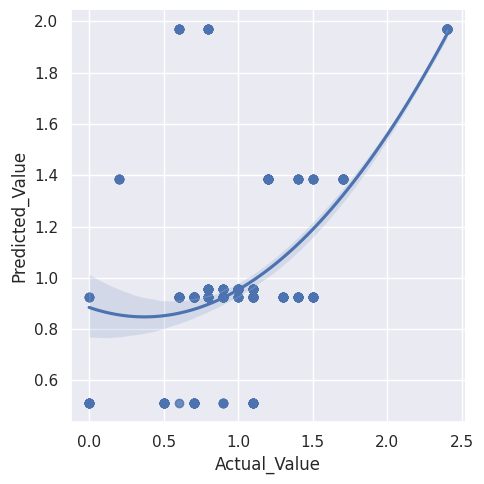

In [97]:
prim_plot(y_test,pred_test_tree)

In [98]:

for i in range(1,500):
  print("------------------------------------------------------")
  dtree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=0.13)
  dtree.fit(X_train, y_train)
  pred_test_tree= dtree.predict(X_test)
  k = r2_score(y_test, pred_test_tree)
  if k>0:
    print(k,i)

------------------------------------------------------
0.38123019949369874 1
------------------------------------------------------
0.4343781280455612 2
------------------------------------------------------
0.5098773648141091 3
------------------------------------------------------
0.5559602317582525 4
------------------------------------------------------
0.5559602317582526 5
------------------------------------------------------
0.5559602317582525 6
------------------------------------------------------
0.5559602317582526 7
------------------------------------------------------
0.5559602317582528 8
------------------------------------------------------
0.5559602317582524 9
------------------------------------------------------
0.5559602317582525 10
------------------------------------------------------
0.5559602317582524 11
------------------------------------------------------
0.5559602317582525 12
------------------------------------------------------
0.5559602317582524 13
-------

In [99]:
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2'
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train)

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [100]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1)))
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1)))
print(r2_score(y_test, y1))

0.3399190793724214
0.6548927040713872
0.3367438465364088
0.6516674285274433


#Random Forest (or Bootstrap Aggregation)

In [101]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train)
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

6.832870129697045e-15
1.0
7.083690794038981e-15
1.0


In [102]:

for i in range(100,1000,100):
  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)
  model_rf.fit(X_train, y_train)
  pred_test_rf= model_rf.predict(X_test)
  k = r2_score(y_test, pred_test_rf)
  if k>0:
    print("------------------------------------------------------")
    print(k,i)

------------------------------------------------------
1.0 100
------------------------------------------------------
1.0 200
------------------------------------------------------
1.0 300
------------------------------------------------------
1.0 400
------------------------------------------------------
1.0 500
------------------------------------------------------
1.0 600
------------------------------------------------------
1.0 700
------------------------------------------------------
1.0 800
------------------------------------------------------
1.0 900


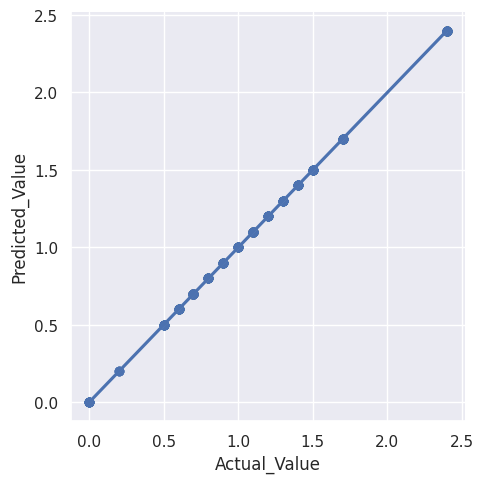

In [103]:
prim_plot(y_test,pred_test_rf)

#NonLinear

In [114]:
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(r2_score(y_test, y_pred))

0.4811603813733547


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [117]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = RBF()
gp = GaussianProcessRegressor(alpha=1e-1, kernel=kernel)
print(gp.get_params())


gp = gp.fit(X_train, y_train)
print('Optimized kernel parameters:',gp.kernel_.get_params())


y_pred = gp.predict(X_test)
print(r2_score(y_test, y_pred))

{'alpha': 0.1, 'copy_X_train': True, 'kernel__length_scale': 1.0, 'kernel__length_scale_bounds': (1e-05, 100000.0), 'kernel': RBF(length_scale=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': None}
Optimized kernel parameters: {'length_scale': 4.499383892985823, 'length_scale_bounds': (1e-05, 100000.0)}
0.9999245342818964
